In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
data = pd.read_csv(r"C:\Users\91822\Downloads\heart.csv")

In [66]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [67]:
data.info

<bound method DataFrame.info of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2

In [30]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [68]:
data.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [69]:
data.duplicated().sum()

np.int64(723)

In [70]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


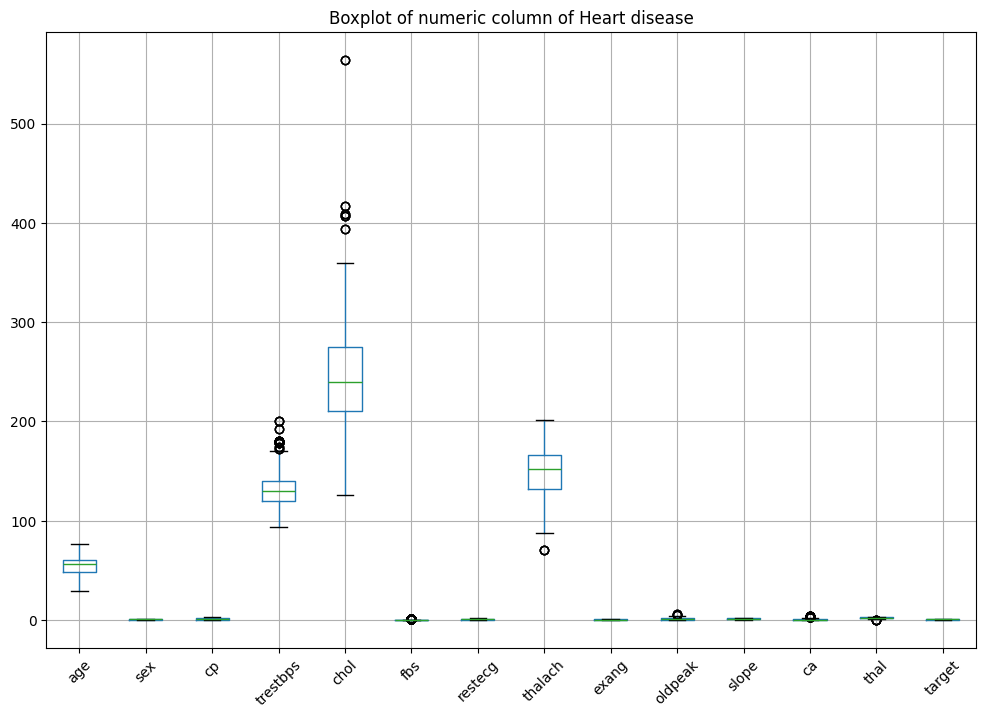

In [71]:
# Demonstrating Boxplot for seeing outlier

data.boxplot(figsize=(12,8))
plt.title("Boxplot of numeric column of Heart disease")
plt.xticks(rotation=45)
plt.show()                    

In [20]:
#we can clearly see the outliers of the data

In [72]:
#Capping of the outliers

def outlier_capping(data, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    data[column] = data[column].apply(
        lambda x: lower_limit if x < lower_limit 
        else upper_limit if x > upper_limit 
        else x
    )

# Apply outlier capping to all numeric columns
for column in data.select_dtypes(include=['int', 'float']).columns:
    outlier_capping(data, column)

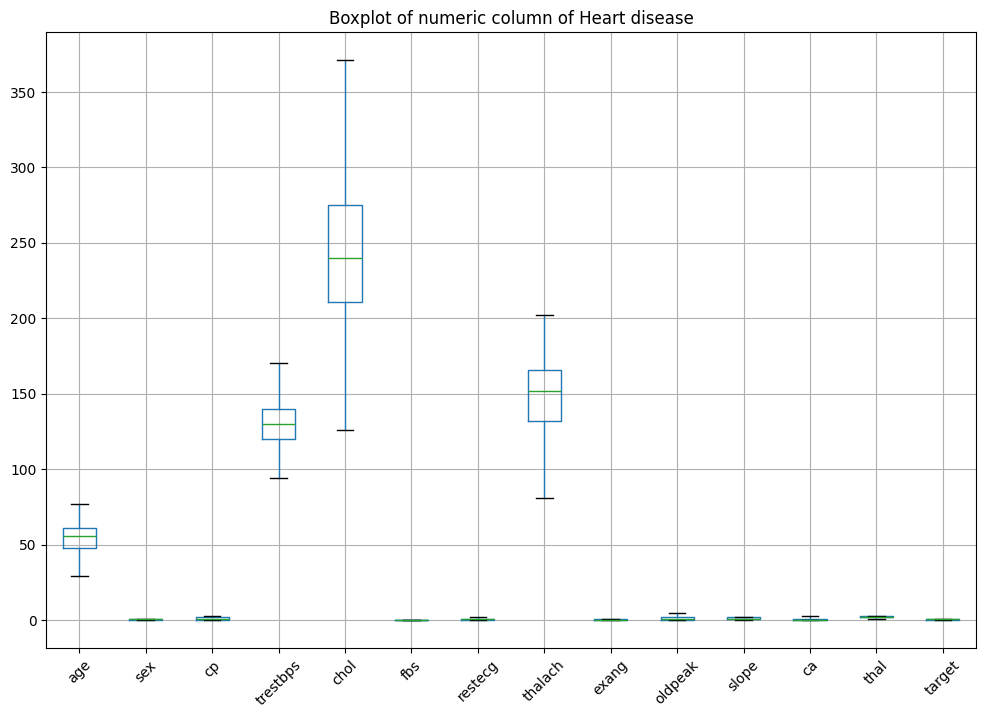

In [73]:
#Again I want to demonstrate the boxplot 

data.boxplot(figsize=(12,8))
plt.title("Boxplot of numeric column of Heart disease")
plt.xticks(rotation=45)
plt.show()  

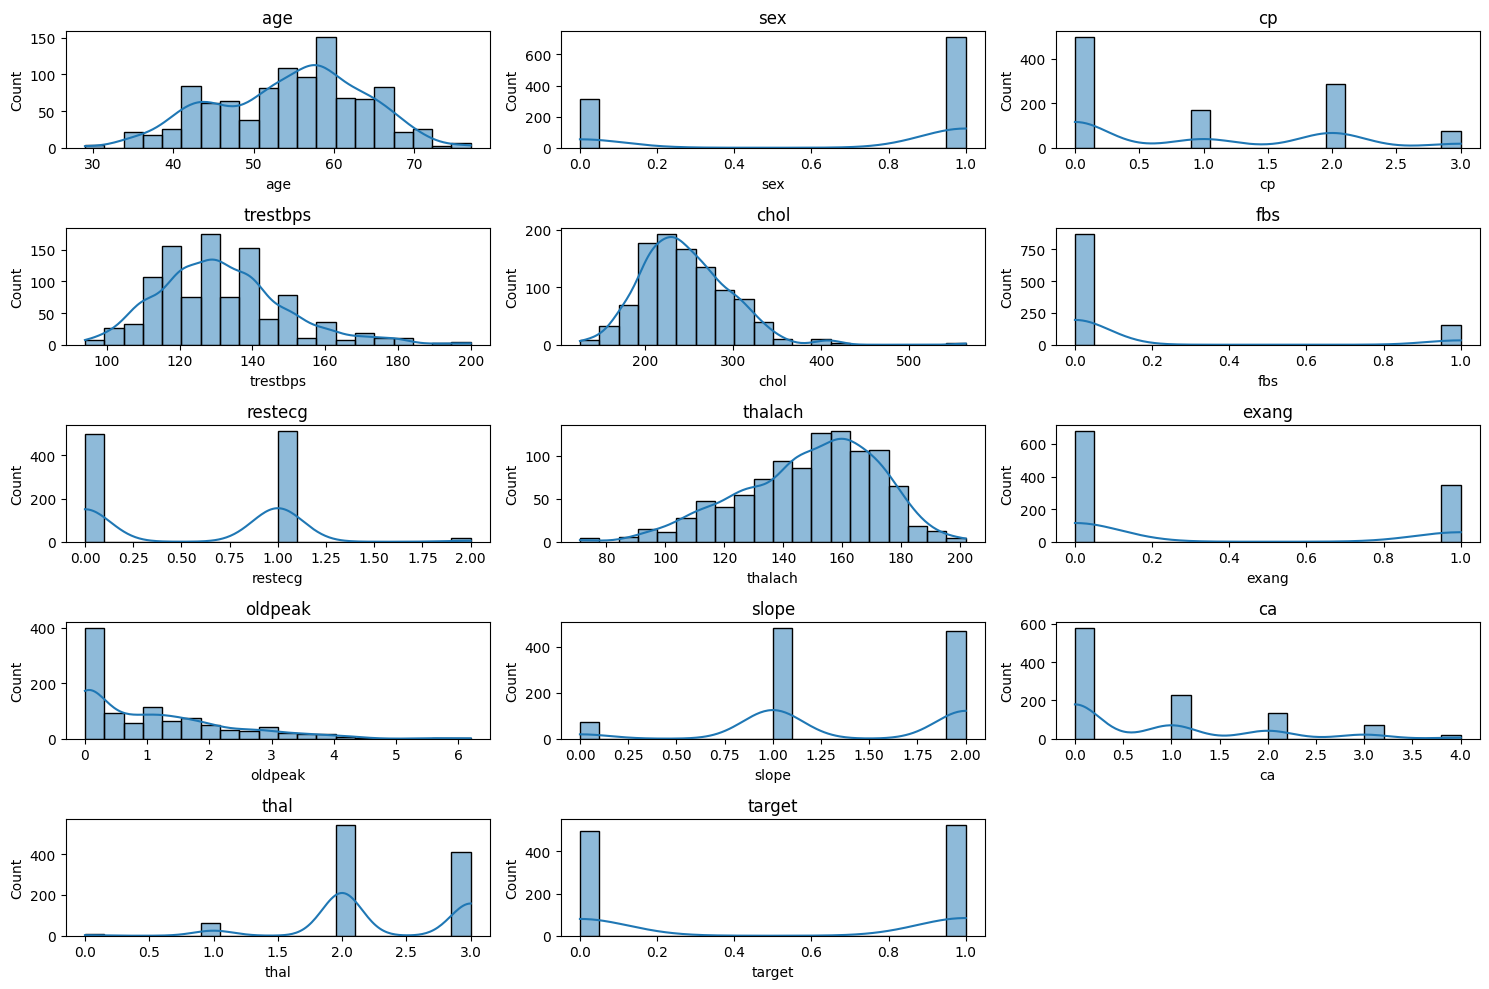

In [74]:
#Plotting Histogram of all numeric value in Hear Disease in the data set
numeric_cols = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols)//3 + 1, 3, i)  # 3 per row
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

In [25]:
''' 3. Feature Engineering:
If necessary, perform feature engineering techniques such as encoding categorical variables, 
scaling numerical features, or handling missing values.'''

'3. Feature Engineering:\nIf necessary, perform feature engineering techniques such as encoding categorical variables, \nscaling numerical features, or handling missing values.'

In [76]:
arr = data.values

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
sc =StandardScaler()
sc.fit(arr)

,copy,True
,with_mean,True
,with_std,True


In [79]:
sc.fit_transform(arr)

array([[-0.26843658,  0.66150409, -0.91575542, ...,  1.4672853 ,
         1.10488637, -1.02669772],
       [-0.15815703,  0.66150409, -0.91575542, ..., -0.77995778,
         1.10488637, -1.02669772],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -0.77995778,
         1.10488637, -1.02669772],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ...,  0.34366376,
        -0.53762056, -1.02669772],
       [-0.4889957 , -1.51170646, -0.91575542, ..., -0.77995778,
        -0.53762056,  0.97399651],
       [-0.04787747,  0.66150409, -0.91575542, ...,  0.34366376,
         1.10488637, -1.02669772]], shape=(1025, 14))

In [ ]:
#No need of Standardization here

In [88]:
#Splitting the data into trainning and testing set

x=data.drop('target', axis=1)
y=data['target']

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split (x,y, test_size=0.2,random_state=42)

In [98]:
#Implementing a Decision Tree Classification model 

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support,
    classification_report, confusion_matrix, roc_auc_score)
from sklearn.model_selection import cross_val_score, train_test_split

In [94]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None, min_samples_split=2,
    min_samples_leaf=1, random_state=42 )

# Train
dt.fit(x_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [96]:
# Predict (if you have X_test/y_test)
y_pred = dt.predict(x_test)

In [97]:
# Evaluate
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))

Accuracy: 0.9854


In [ ]:

# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision, Recall, F1 (macro = treats classes equally; change to 'weighted' if imbalanced)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="macro", zero_division=0)

# ROC-AUC
if y_proba is not None:
    # Binary: y_proba[:,1]; Multiclass: use one-vs-rest
    try:
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    except Exception:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
else:
    roc_auc = None  # not available without predict_proba

print(f"Accuracy : {acc:.4f}")
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro)   : {rec:.4f}")
print(f"F1-score (macro) : {f1:.4f}")
print(f"ROC-AUC          : {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A (no probabilities)")

# Extra detail
print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


In [99]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy : {acc:.4f}")

Accuracy : 0.9854


In [100]:
# Precision, Recall, F1 (macro = treats classes equally; change to 'weighted' if imbalanced)
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="macro", zero_division=0)
print(f"Precision (macro): {prec:.4f}")
print(f"Recall (macro)   : {rec:.4f}")
print(f"F1-score (macro) : {f1:.4f}")


Precision (macro): 0.9857
Recall (macro)   : 0.9854
F1-score (macro) : 0.9854


In [103]:
# ROC-AUC
y_proba = dt.predict_proba(x_test)
if y_proba is not None:
    try:
        roc_auc = roc_auc_score(y_test, y_proba[:, 1])
    except Exception:
        roc_auc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
else:
    roc_auc = None  # not available without predict_proba

print(f"ROC-AUC          : {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A (no probabilities)")    

ROC-AUC          : 0.9854


In [106]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

base = DecisionTreeClassifier(random_state=42)

param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_depth": randint(3, 40),          # integers in [3, 39]
    "min_samples_split": randint(2, 60),
    "min_samples_leaf": randint(1, 30),
    "max_features": [None, "sqrt", "log2"],
    "class_weight": [None, "balanced"],
    "ccp_alpha": uniform(0.0, 0.03)       # continuous [0, 0.03)
}

scorer = "f1_macro"

rs = RandomizedSearchCV(
    estimator=base,
    param_distributions=param_dist,
    n_iter=60,       # increase for better search
    scoring=scorer,
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rs.fit(x_train, y_train)

best_dt = rs.best_estimator_
print("Best params:", rs.best_params_)
print(f"CV({scorer}) mean:", round(rs.best_score_, 4))




Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best params: {'ccp_alpha': np.float64(0.0028852965327426225), 'class_weight': None, 'criterion': 'gini', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 11, 'min_samples_split': 29, 'splitter': 'best'}
CV(f1_macro) mean: 0.8699


In [107]:
# Test evaluation
y_pred  = best_dt.predict(x_test)
y_proba = best_dt.predict_proba(x_test)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
print("\nTest Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

try:
    roc = roc_auc_score(y_test, y_proba[:, 1])
except Exception:
    roc = roc_auc_score(y_test, y_proba, multi_class="ovr", average="macro")
print("ROC-AUC:", round(roc, 4))



Test Accuracy: 0.8293

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       102
           1       0.84      0.82      0.83       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205

ROC-AUC: 0.9051


<Figure size 1800x1000 with 0 Axes>

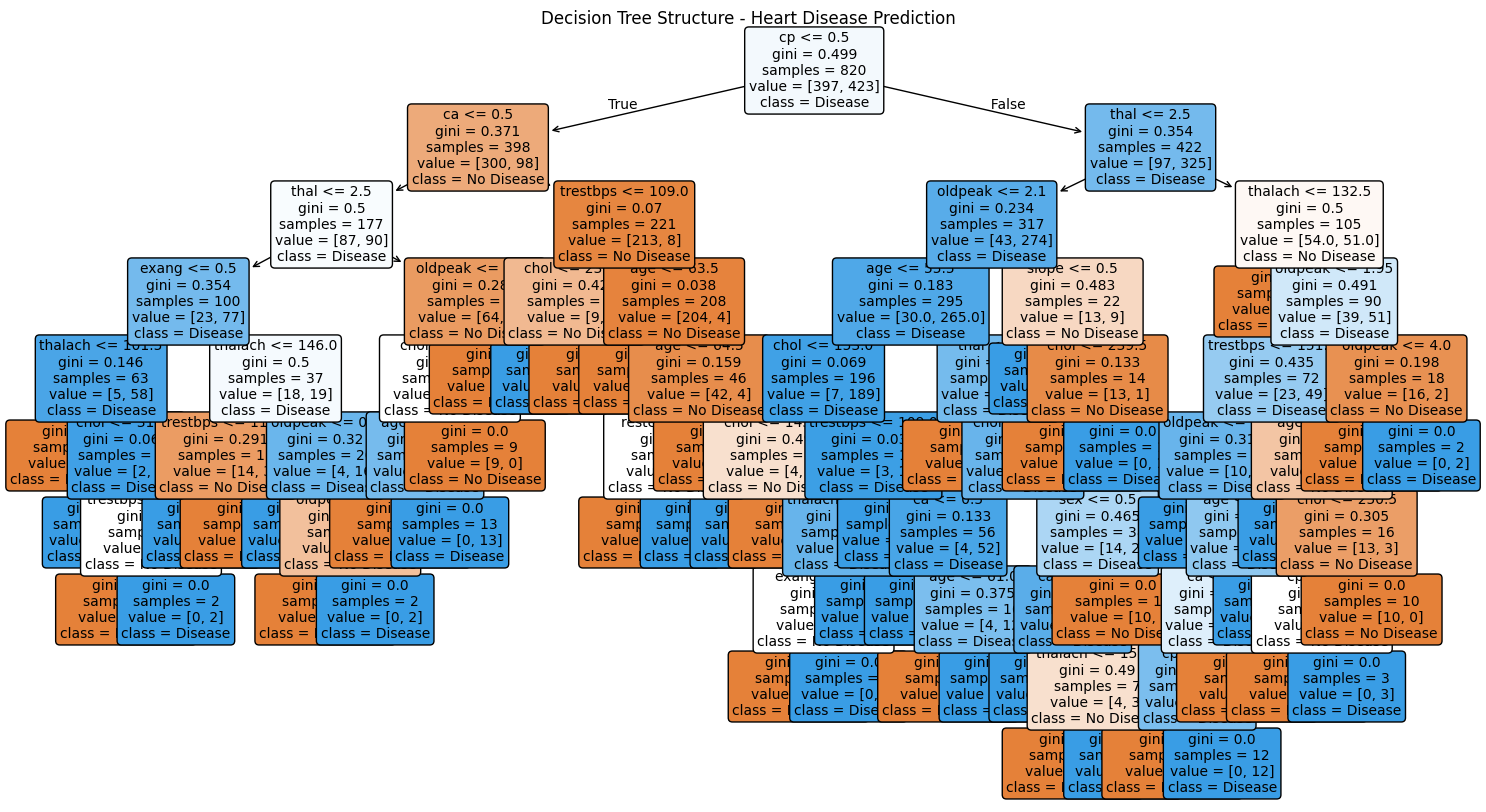

In [109]:
#Visualizing the decesion tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(18, 10))
plot_tree(
    dt,
    feature_names=x_train.columns,
    class_names=['No Disease', 'Disease'],  # update labels if different
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Structure - Heart Disease Prediction")
plt.show()


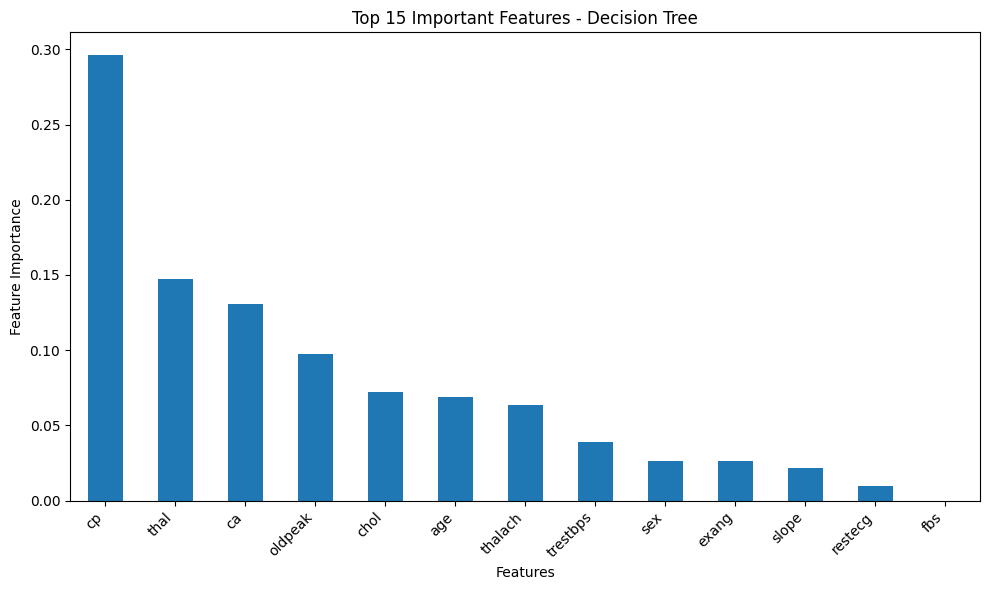


Top Important Features:
 cp          0.296497
thal        0.147141
ca          0.130887
oldpeak     0.097461
chol        0.072288
age         0.069104
thalach     0.063590
trestbps    0.039207
sex         0.026434
exang       0.026190
dtype: float64


In [111]:
#Important Feature

feature_importance = pd.Series(dt.feature_importances_, index=x_train.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.head(15).plot(kind='bar')
plt.title("Top 15 Important Features - Decision Tree")
plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop Important Features:\n", feature_importance.head(10))


In [ ]:

Interview Questions:
    
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Ans :- a) criterion

Options: "gini", "entropy", "log_loss"

Meaning: Metric used to measure the quality of a split (impurity).

Effect:

"gini" - faster, slightly simpler.

"entropy" / "log_loss" - more information-theoretic, sometimes better for unbalanced data.

⚙️ Tuning Tip: Usually doesn’t change results much, but "entropy" can make splits more balanced.

🌲 b) max_depth

Meaning: The maximum depth of the tree (number of splits from root to leaf).

Effect:

Higher depth: More complex model - higher training accuracy but risk of overfitting.

Lower depth: Simpler model - better generalization but may underfit.

Tuning Tip: Start with None, then limit to 3–10 to reduce overfitting.

c) min_samples_split

Meaning: Minimum number of samples required to split an internal node.

Effect:

Small value (e.g., 2): Tree can grow deep → may overfit.

Larger value (e.g., 10, 20): Restricts splitting → smoother, more general rules.

Tuning Tip: Try values between 2 and 50.

d) min_samples_leaf

Meaning: Minimum number of samples required at a leaf node.

Effect:

Small value (1): Detailed splits - high variance (overfitting).

Larger value: Merges small groups - smoother predictions.

Tuning Tip: Use between 1–10 for medium datasets; higher for noisy data.

e) max_features

Meaning: Number of features to consider when looking for the best split.

Effect:

Smaller subset: Adds randomness - helps generalization (especially in ensembles like Random Forests).

All features: More deterministic - might overfit slightly.

Tuning Tip: Use "sqrt" or "log2" for classification tasks.

f) splitter

Options: "best" or "random"

Meaning: Strategy for choosing the split at each node.

Effect:

"best" - deterministic, always chooses optimal feature.

"random" - adds randomness, can help generalization.

Tuning Tip: "best" for accuracy, "random" for diversity (in ensembles).

g) ccp_alpha (Cost Complexity Pruning parameter)

Meaning: Controls post-pruning — removes branches that add little gain.

Effect:

Higher value - more pruning → simpler tree.

Lower value - less pruning → complex tree.

Tuning Tip: Use GridSearchCV with values between 0.0 and 0.02 to reduce overfitting.

h)random_state

Meaning: Controls randomness for reproducibility.

Effect: Doesn’t affect performance, just ensures consistent results.


In [ ]:
2. What is the difference between the Label encoding and One-hot encoding?
Ans-: Label Encoding

It converts categorical values into numeric labels (like Male → 0, Female → 1, Other → 2).

Useful when the categories have a natural order (like Low < Medium < High).

Works well with tree-based models (Decision Tree, Random Forest, XGBoost), because they don’t assume numeric distance.

Drawback: It introduces an artificial ordinal relationship — models like Logistic Regression may think “2 > 1 > 0”, which doesn’t make sense for unordered categories.

One-Hot Encoding

It creates a separate binary column for each category (like Male:1, Female:0, Other:0, etc.).

Best for nominal data (no natural order, like color, gender, city).

Works well with linear or distance-based models (Logistic Regression, SVM, KNN).

Drawback: Can increase the number of features — known as the “curse of dimensionality” if there are many unique categories.